In [1]:
# load the feature

import os
import numpy
import joblib

tot = 1

features = []
for i in range(tot):
    feature = joblib.load('sf/' + os.listdir('sf')[i])
    features += [feature]

features = numpy.array(features, dtype = 'float32')
features.shape

(1, 1027, 2467)

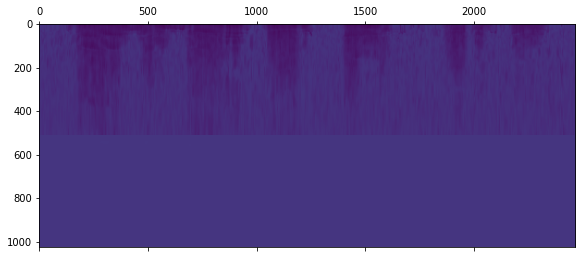

In [2]:
# plot the feature

import matplotlib.pyplot as pp

pp.matshow(features[0])
pp.show()

In [3]:
# trim the feature: (1027, 2467) => (512, 1024)

import numpy

tot = 1
dim = (512, 1024)

features = []
for i in range(tot):
    feature = joblib.load('sf/' + os.listdir('sf')[i])
    trimmed = [list(row[:dim[1]]) for row in feature[:dim[0]]]
    features += [trimmed]

features = numpy.array(features, dtype = 'float32')
features.shape

(1, 512, 1024)

In [4]:
# normalize and transpose the feature: (512, 1024) => (1024, 512)

new_features = []
for feature in features:
    feature = (feature - numpy.mean(feature)) / numpy.std(feature)
    new_features += [feature.T]

features = numpy.array(new_features, dtype = 'float32')
features.shape

(1, 1024, 512)

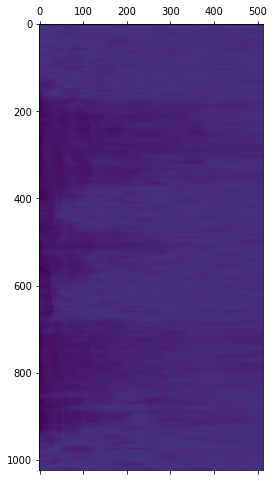

In [5]:
# plot the transposed feature

pp.matshow(features[0])
pp.show()

In [ ]:
from keras.models import Sequential
from keras.layers import CuDNNLSTM

units = 512

model = Sequential()
model.add(CuDNNLSTM(units = units, return_sequences = True, input_shape = (None, features.shape[-1])))
model.add(CuDNNLSTM(units = units, return_sequences = True))
model.add(CuDNNLSTM(units = units, return_sequences = True))
model.add(CuDNNLSTM(units = features.shape[-1], return_sequences = True))

model.compile(loss = 'mean_absolute_error', optimizer = 'Adam')
hist = model.fit(
    x               = features        ,
    y               = features        ,
    epochs          = 256             , 
    verbose         = 1               )

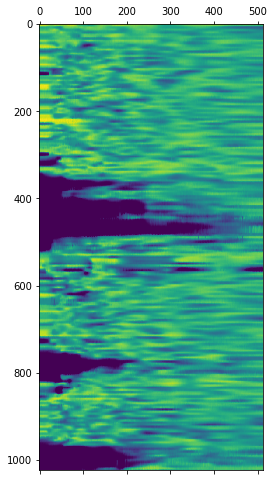

In [6]:
# result = model.predict(features)

result = numpy.load('result.npy')
pp.matshow(result[0])
pp.show()